In [ ]:
install.packages("ggplot2", quiet=T)
install.packages("corrplot")
install.packages("RColorBrewer")
install.packages("patchwork")
install.packages("magrittr") 
install.packages("dplyr") 
install.packages("cluster")
install.packages("mltools")
install.packages("data.table")
install.packages("superml")

In [ ]:
library("ggplot2")

In [ ]:
ewcs=read.csv("/content/EWCS_2016.csv",sep=",",header=TRUE)
ewcs[,][ewcs[, ,] == -999] <- NA
kk=complete.cases(ewcs)
ewcs=ewcs[kk,]

#R code to import and prepare the student performance dataset

school1=read.table("student-mat.csv",sep=";",header=TRUE)
school2=read.table("student-por.csv",sep=";",header=TRUE)
schools=merge(school1,school2,by=c("school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"))

#R code to import the bank marketing dataset
bank=read.table("/content/bank.csv",sep=";",header=TRUE)

### Task 1


In [ ]:
dim(ewcs)
summary(ewcs)

[1] 7647   11

'data.frame':	7647 obs. of  11 variables:
 $ Q2a : int  1 2 2 1 2 1 1 2 2 2 ...
 $ Q2b : int  63 58 32 35 27 19 23 24 22 54 ...
 $ Q87a: int  3 2 2 3 2 2 2 3 3 3 ...
 $ Q87b: int  3 3 2 2 2 2 3 3 3 2 ...
 $ Q87c: int  3 2 3 2 3 2 3 1 2 2 ...
 $ Q87d: int  3 3 2 2 3 2 3 2 2 3 ...
 $ Q87e: int  3 2 3 3 2 3 3 3 3 3 ...
 $ Q90a: int  2 2 2 2 2 2 1 2 2 3 ...
 $ Q90b: int  2 3 2 2 4 1 1 2 1 2 ...
 $ Q90c: int  2 2 2 2 2 2 2 2 2 3 ...
 $ Q90f: int  2 2 2 2 2 1 1 1 1 1 ...


      Q2a            Q2b             Q87a            Q87b            Q87c      
 Min.   :1.00   Min.   :15.00   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.00   1st Qu.:34.00   1st Qu.:2.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :1.00   Median :43.00   Median :2.000   Median :2.000   Median :2.000  
 Mean   :1.49   Mean   :43.16   Mean   :2.426   Mean   :2.606   Mean   :2.415  
 3rd Qu.:2.00   3rd Qu.:52.00   3rd Qu.:3.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :2.00   Max.   :87.00   Max.   :6.000   Max.   :6.000   Max.   :6.000  
      Q87d            Q87e            Q90a            Q90b      
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:2.000   1st Qu.:2.000   1st Qu.:1.000  
 Median :2.000   Median :2.000   Median :2.000   Median :2.000  
 Mean   :2.717   Mean   :2.408   Mean   :2.126   Mean   :2.194  
 3rd Qu.:3.000   3rd Qu.:3.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :6.000   Max.   :6.000   Max.   :5.000   M

In [ ]:
scaled_df = scale(ewcs)

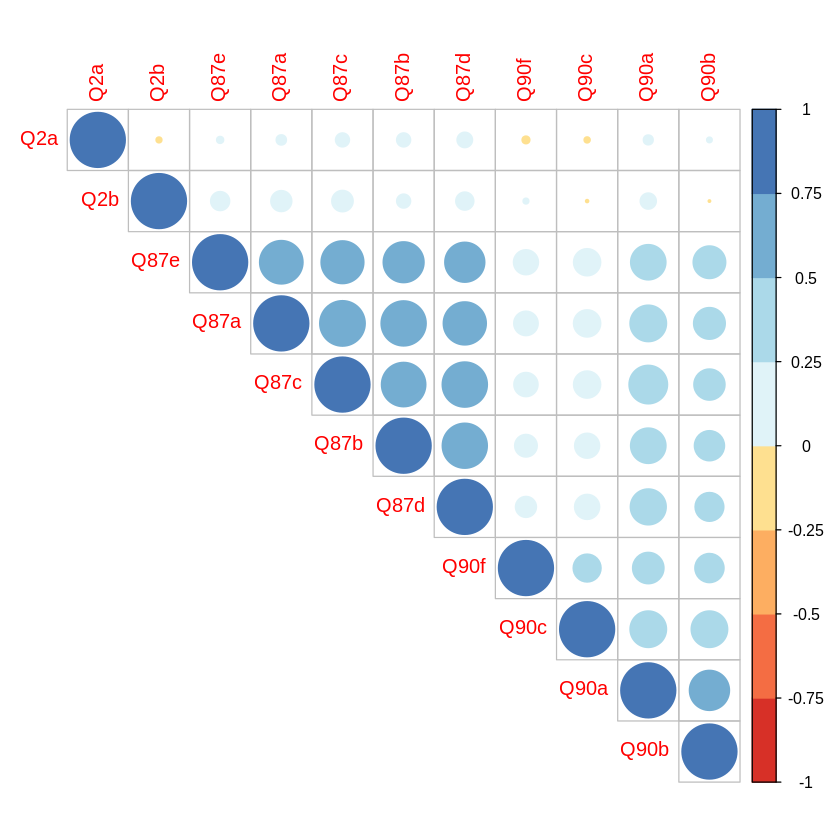

In [ ]:
library(corrplot)
library(RColorBrewer)
M <-cor(ewcs)
corrplot(M, type="upper", order="hclust",
         col=brewer.pal(n=8, name="RdYlBu"))

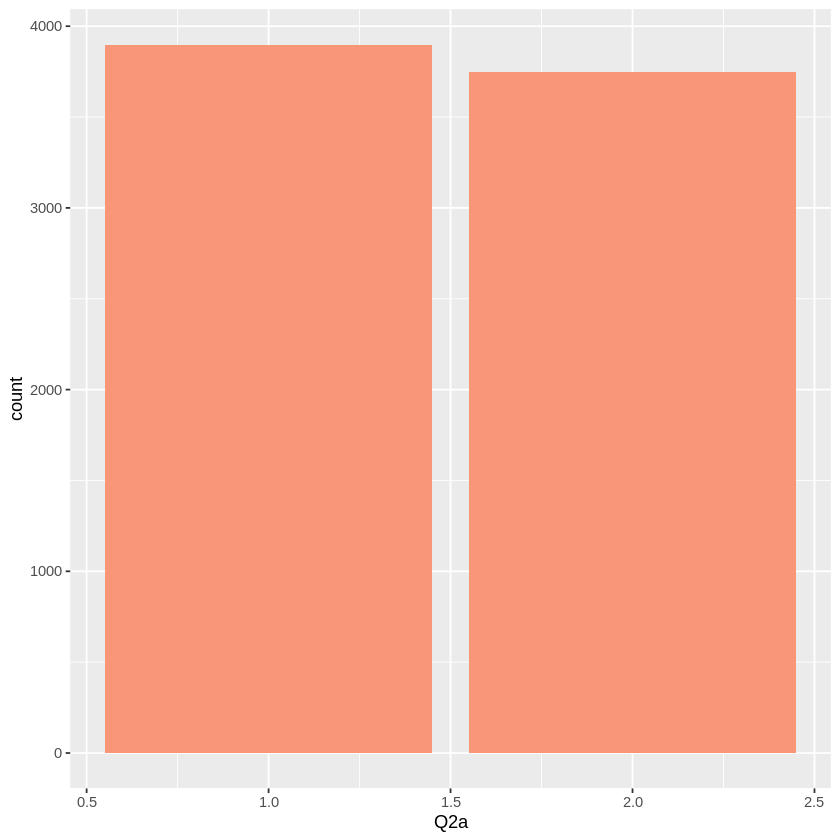

In [ ]:
ggplot(ewcs, aes(x = Q2a), fill = Q2a) + geom_bar( fill = "#FA9678")

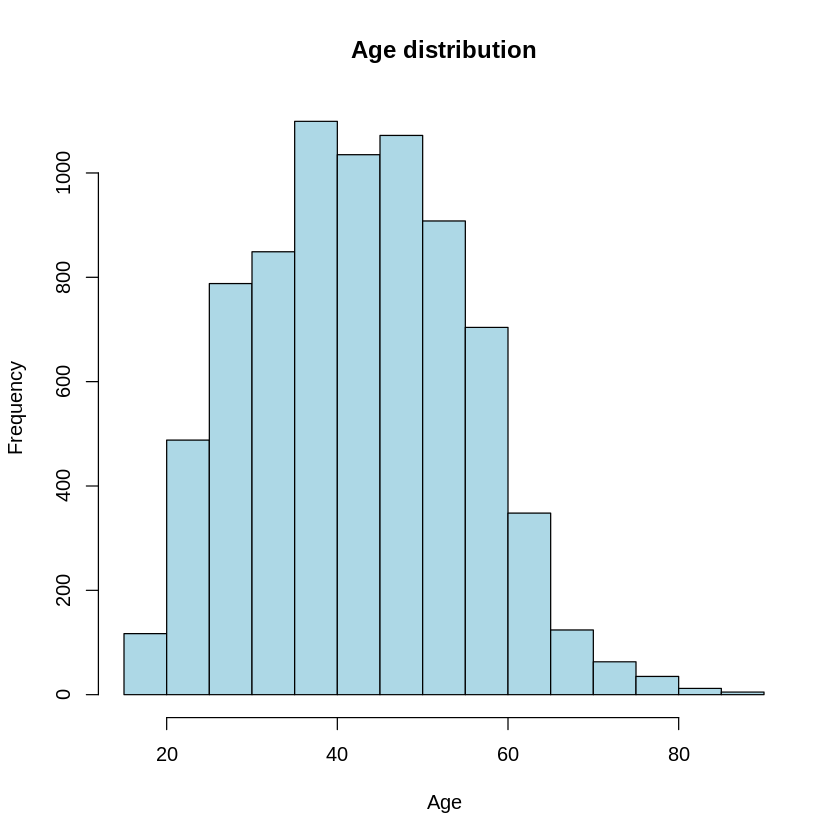

In [ ]:
age.dist <- as.vector(ewcs$Q2b)
hist(age.dist, main="Age distribution", xlab="Age", col = "lightblue")

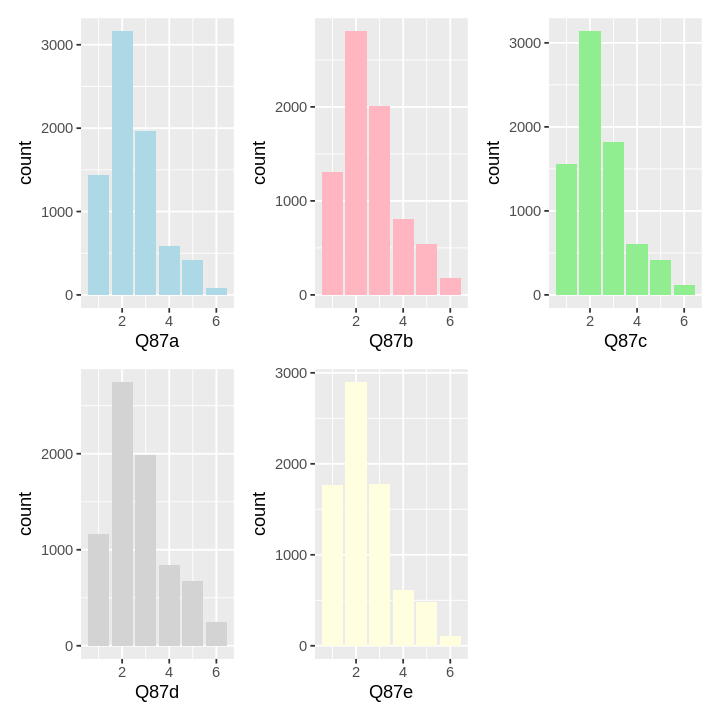

In [ ]:

p1 <- ggplot(ewcs, aes(x = Q87a)) + geom_bar(fill="lightblue") 
p2 <- ggplot(ewcs, aes(x = Q87b)) + geom_bar(fill="lightpink")
p3 <- ggplot(ewcs, aes(x = Q87c)) + geom_bar(fill="lightgreen")
p4 <- ggplot(ewcs, aes(x = Q87d)) + geom_bar(fill="lightgrey")
p5 <- ggplot(ewcs, aes(x = Q87e)) + geom_bar(fill="lightyellow")
p1+p2+p3+p4+p5

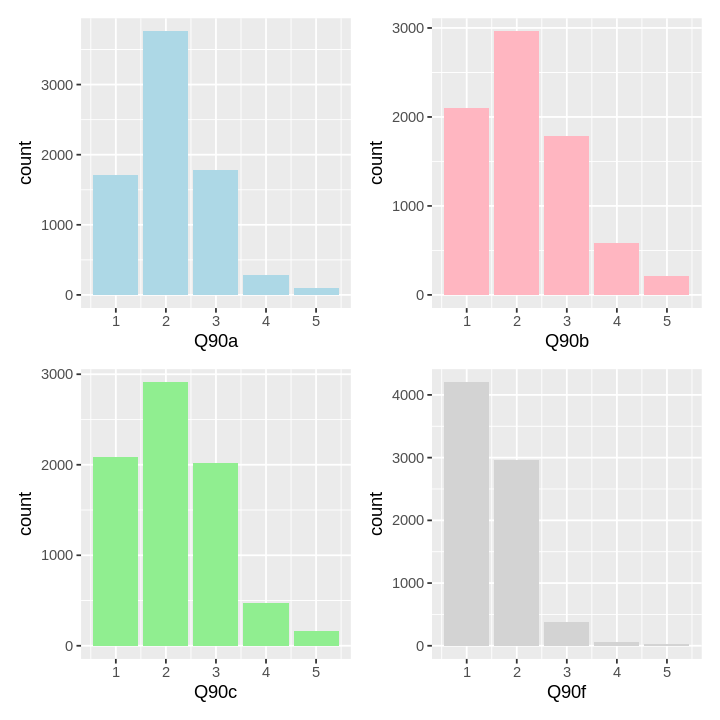

In [ ]:
p1 <- ggplot(ewcs, aes(x = Q90a)) + geom_bar(fill="lightblue") 
p2 <- ggplot(ewcs, aes(x = Q90b)) + geom_bar(fill="lightpink")
p3 <- ggplot(ewcs, aes(x = Q90c)) + geom_bar(fill="lightgreen")
p4 <- ggplot(ewcs, aes(x = Q90f)) + geom_bar(fill="lightgrey")
p1+p2+p3+p4

In [ ]:
pca <- prcomp(scaled_df, center = TRUE,scale. = TRUE)

summary(pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.0985 1.1874 1.01058 0.97061 0.88319 0.74969 0.71299
Proportion of Variance 0.4003 0.1282 0.09284 0.08564 0.07091 0.05109 0.04621
Cumulative Proportion  0.4003 0.5285 0.62133 0.70697 0.77788 0.82898 0.87519
                           PC8     PC9    PC10    PC11
Standard deviation     0.65201 0.59566 0.56499 0.52321
Proportion of Variance 0.03865 0.03226 0.02902 0.02489
Cumulative Proportion  0.91384 0.94609 0.97511 1.00000

In [ ]:
library(patchwork)

[1] 84106.00 62806.69 56445.02 52327.82 49586.71 47431.08 45723.98 44153.06
 [9] 42853.80 41708.08

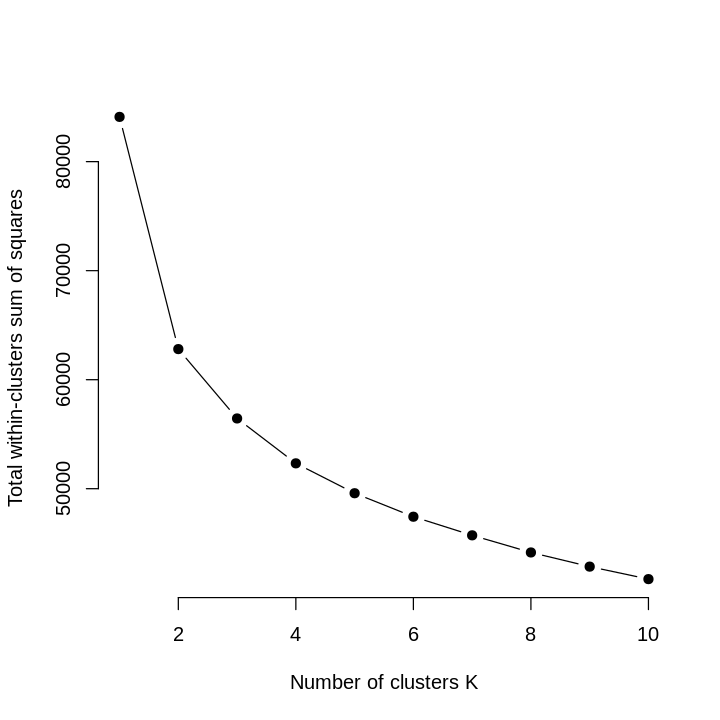

In [ ]:
#Elbow Method for finding the optimal number of clusters
set.seed(0)

k.max <- 10
data <- scaled_df
wss <- sapply(1:k.max, 
              function(k){kmeans(data, k, nstart=50,iter.max = 15 )$tot.withinss})
wss
plot(1:k.max, wss,
     type="b", pch = 19, frame = FALSE, 
     xlab="Number of clusters K",
     ylab="Total within-clusters sum of squares")

In [ ]:
cluster.clusters = cluster$cluster
table(cluster.clusters) 

cluster.clusters
   1    2    3 
3683 1366 2598 

In [ ]:
sub.group = cluster.clusters
ewcs %>% 
  mutate(Cluster = sub.group) %>%
  group_by(Cluster) %>%
  summarise_all("median")

Cluster,Q2a,Q2b,Q87a,Q87b,Q87c,Q87d,Q87e,Q90a,Q90b,Q90c,Q90f
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,43,2,3,2,3,2,2,2,2,2
2,2,47,4,4,4,4,4,3,3,3,2
3,1,41,2,2,1,2,1,1,1,1,1


In [ ]:
library(cluster)

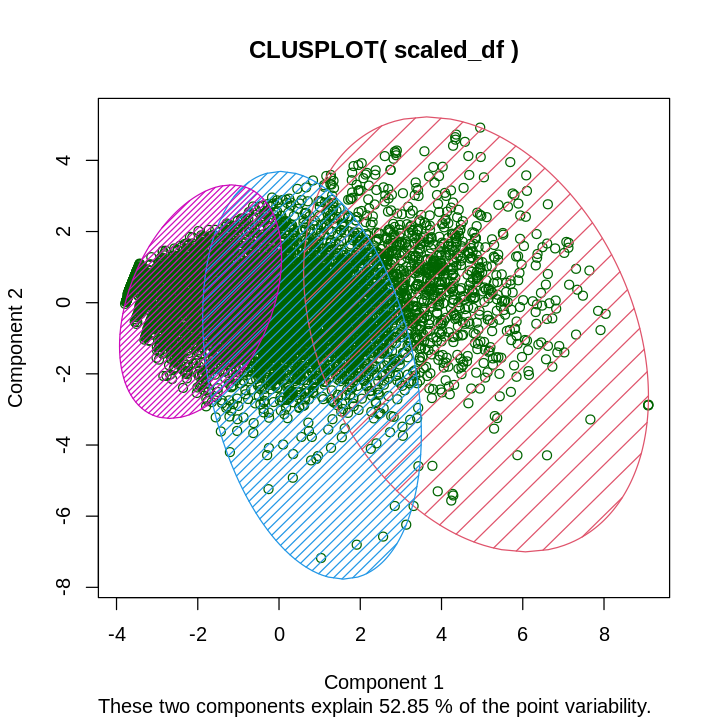

In [ ]:
clusplot(scaled_df,cluster$cluster, color = TRUE, shade= TRUE, labels = 0, lines = 0, plotchar	
 = FALSE)

### Task 2

In [ ]:
dim(school1)
dim(school2)

[1] 395  33

[1] 649  33

In [ ]:
summary(schools)

    school              sex                 age          address         
 Length:382         Length:382         Min.   :15.00   Length:382        
 Class :character   Class :character   1st Qu.:16.00   Class :character  
 Mode  :character   Mode  :character   Median :17.00   Mode  :character  
                                       Mean   :16.59                     
                                       3rd Qu.:17.00                     
                                       Max.   :22.00                     
   famsize            Pstatus               Medu            Fedu      
 Length:382         Length:382         Min.   :0.000   Min.   :0.000  
 Class :character   Class :character   1st Qu.:2.000   1st Qu.:2.000  
 Mode  :character   Mode  :character   Median :3.000   Median :3.000  
                                       Mean   :2.806   Mean   :2.565  
                                       3rd Qu.:4.000   3rd Qu.:4.000  
                                       Max.   :4.000   M

In [ ]:
school1_2 = within(school1, rm(G1, G2))
school2_2 = within(school2, rm(G1, G2))

In [ ]:
library(mltools)
library(data.table)

In [ ]:
school1_3 <- one_hot(as.data.table(school1_2))
school2_3 <- one_hot(as.data.table(school2_2))

In [ ]:
set.seed(0)
size <- floor(0.75 * nrow(school1_3))
index <- sample(seq_len(nrow(school1_3)), size = size)

train_math <- school1_3[index, ]
test_math <- school1_3[-index, ]

Warning message:
“Removed 28 rows containing non-finite values (stat_density).”


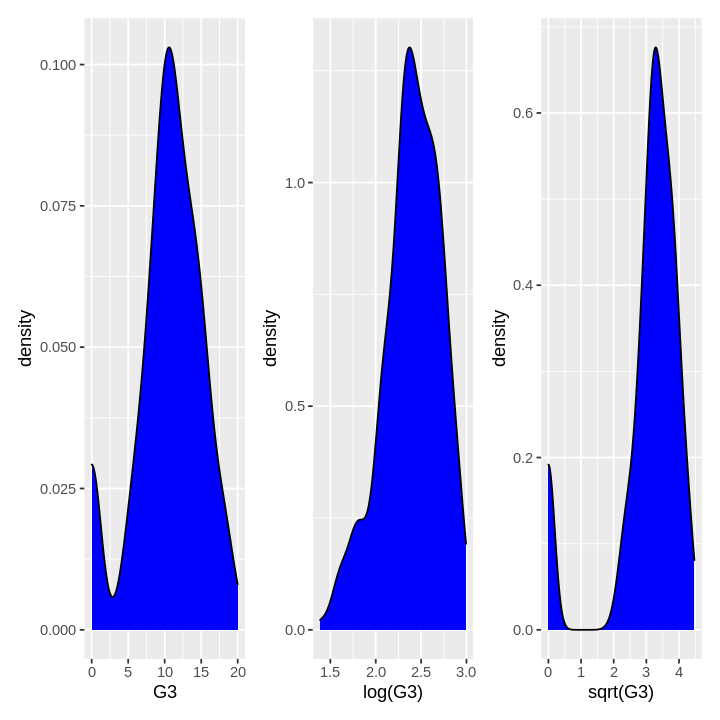

In [ ]:
p1 <- ggplot(train_math, aes(G3)) + geom_density(fill="blue")
p2 <- ggplot(train_math, aes(log(G3))) + geom_density(fill="blue")
p3 <- ggplot(train_math, aes(sqrt(G3))) + geom_density(fill="blue")
p1+p2+p3


Call:
lm(formula = G3 ~ . - Medu, data = train_math)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.6745  -2.1449   0.3135   2.6594   7.8284 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      11.46632    5.26160   2.179   0.0302 *  
schoolMS          0.47121    0.92344   0.510   0.6103    
sexM              1.36521    0.60540   2.255   0.0250 *  
age              -0.12852    0.25302  -0.508   0.6119    
addressU          0.15831    0.70167   0.226   0.8217    
famsizeLE3        0.19022    0.57739   0.329   0.7421    
PstatusT         -1.05805    0.84157  -1.257   0.2098    
Fedu             -0.00854    0.28756  -0.030   0.9763    
Mjobhealth        2.78227    1.22498   2.271   0.0240 *  
Mjobother        -0.76091    0.82874  -0.918   0.3594    
Mjobservices      0.63970    0.87305   0.733   0.4644    
Mjobteacher      -0.91077    1.05412  -0.864   0.3884    
Fjobhealth       -0.43582    1.75148  -0.249   0.8037    
Fjobother      

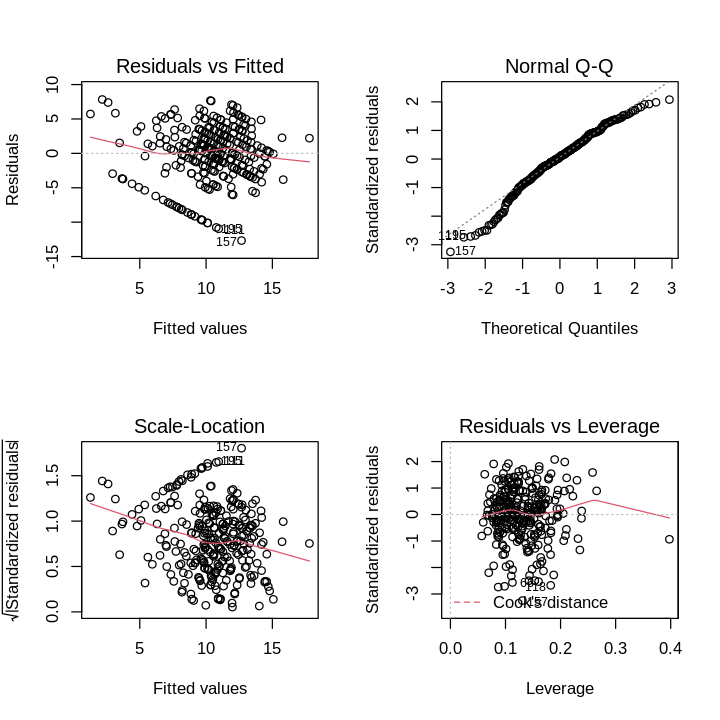

In [ ]:
model1 = lm(G3 ~ ., data=train_math)
summary(model1)
par(mfrow=c(2,2))
plot(model1)

In [ ]:
install.packages('regclass')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘glmnet’, ‘grpreg’, ‘pls’, ‘bestglm’, ‘VGAM’, ‘randomForest’, ‘rpart.plot’




In [ ]:
library(regclass)
VIF(model1)

,GVIF,Df,GVIF^(1/(2*Df))
school,1.577848,1,1.256124
sex,1.552879,1,1.246146
age,1.828108,1,1.352075
address,1.488929,1,1.220217
famsize,1.151771,1,1.073206
Pstatus,1.129502,1,1.062781
Medu,3.115213,1,1.764997
Fedu,2.185962,1,1.478500
Mjob,4.330090,4,1.201053
Fjob,2.648933,4,1.129494


In [ ]:
pred1 <- predict(model1, newdata = test_math)
rmse <- sqrt(sum((exp(pred1) - test_math$G3)^2)/length(test_math$G3))
c(RMSE = rmse, R2=summary(model1)$r.squared)

RMSE           R2 
8.874455e+05 2.944277e-01

In [ ]:
set.seed(0)
size <- floor(0.75 * nrow(school2_3))
index <- sample(seq_len(nrow(school2_3)), size = size)

train_port <- school2_3[index, ]
test_port <- school2_3[-index, ]

Warning message:
“Removed 12 rows containing non-finite values (stat_density).”


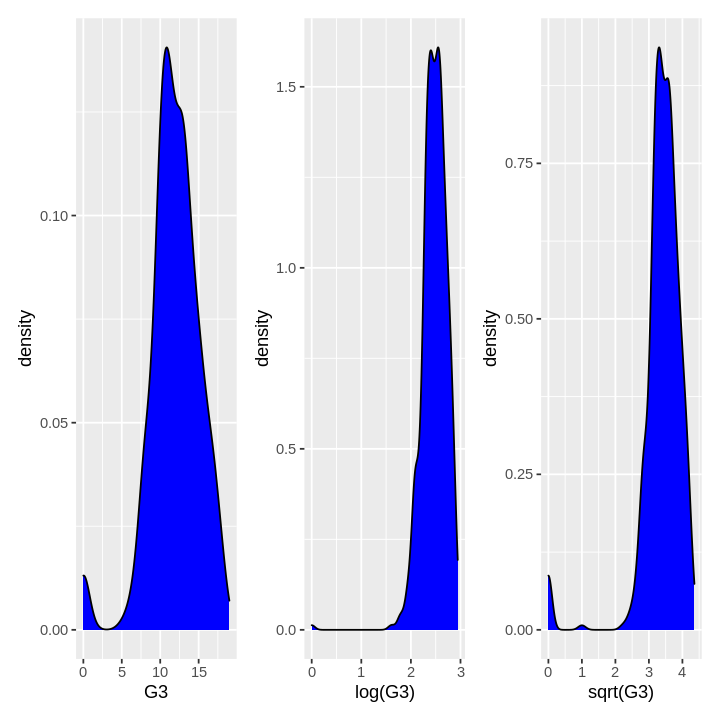

In [ ]:
p1 <- ggplot(train_port, aes(G3)) + geom_density(fill="blue")
p2 <- ggplot(train_port, aes(log(G3))) + geom_density(fill="blue")
p3 <- ggplot(train_port, aes(sqrt(G3))) + geom_density(fill="blue")
p1+p2+p3


Call:
lm(formula = G3 ~ ., data = train_port)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.5097  -1.3151   0.0473   1.3782   7.0568 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       9.71985    2.33326   4.166 3.73e-05 ***
schoolMS         -1.23337    0.31416  -3.926  0.00010 ***
sexM             -0.71471    0.29539  -2.420  0.01594 *  
age               0.15233    0.11891   1.281  0.20083    
addressU          0.49960    0.30770   1.624  0.10515    
famsizeLE3        0.14362    0.28626   0.502  0.61612    
PstatusT          0.14604    0.39902   0.366  0.71455    
Medu              0.02035    0.17628   0.115  0.90815    
Fedu              0.11359    0.16146   0.704  0.48209    
Mjobhealth        1.23485    0.62688   1.970  0.04948 *  
Mjobother        -0.09839    0.36857  -0.267  0.78963    
Mjobservices      0.66857    0.44304   1.509  0.13199    
Mjobteacher       0.73724    0.58325   1.264  0.20689    
Fjobhealth       -0.80

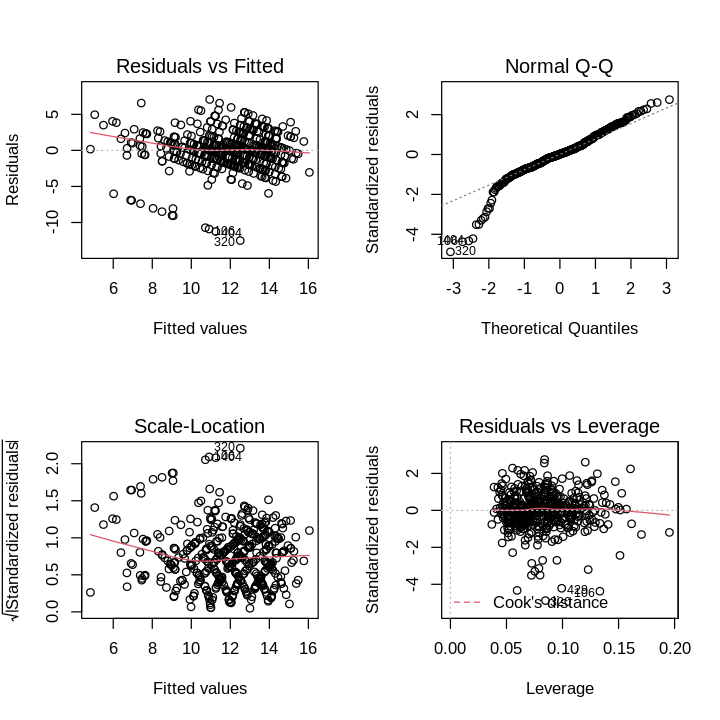

In [ ]:
model2 = lm(G3 ~ ., data=train_port)
summary(model2)
par(mfrow=c(2,2))
plot(model2)

In [ ]:
pred2 <- predict(model2, newdata = test_port)
rmse <- sqrt(sum((exp(pred2) - test_port$G3)^2)/length(test_port$G3))
c(RMSE = rmse, R2=summary(model2)$r.squared)

RMSE           R2 
1.254712e+06 3.847177e-01

### Task 3

In [ ]:
head(bank)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
6,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no


In [ ]:
sapply(bank,function(x) sum(is.na(x)))

age       job   marital education   default   balance   housing      loan 
        0         0         0         0         0         0         0         0 
  contact       day     month  duration  campaign     pdays  previous  poutcome 
        0         0         0         0         0         0         0         0 
        y 
        0

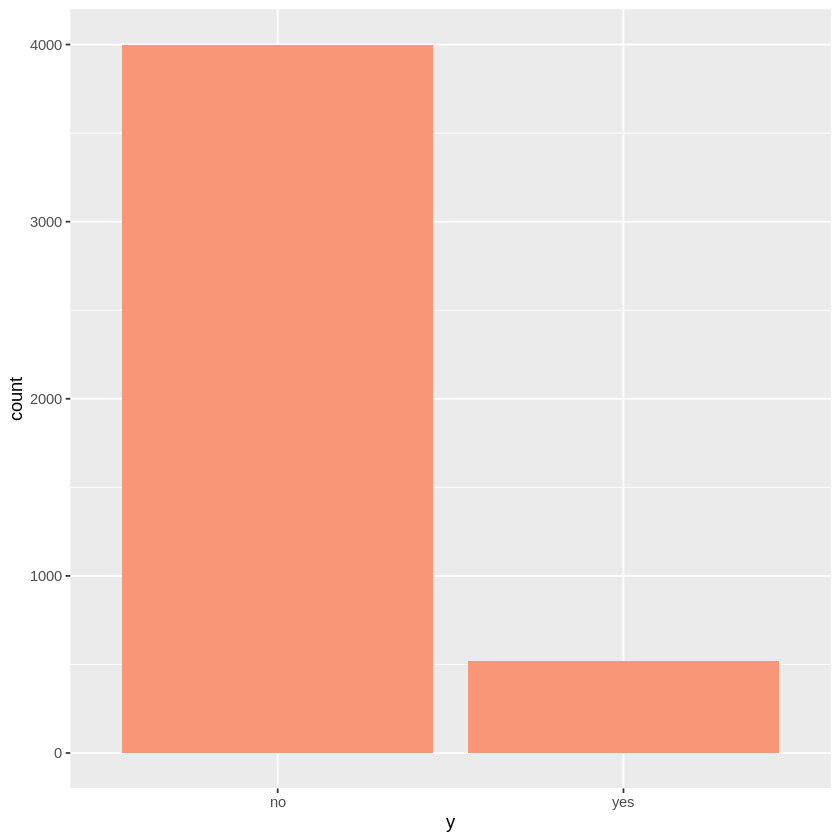

In [ ]:
ggplot(bank, aes(x = y), fill = y) + geom_bar( fill = "#FA9678")

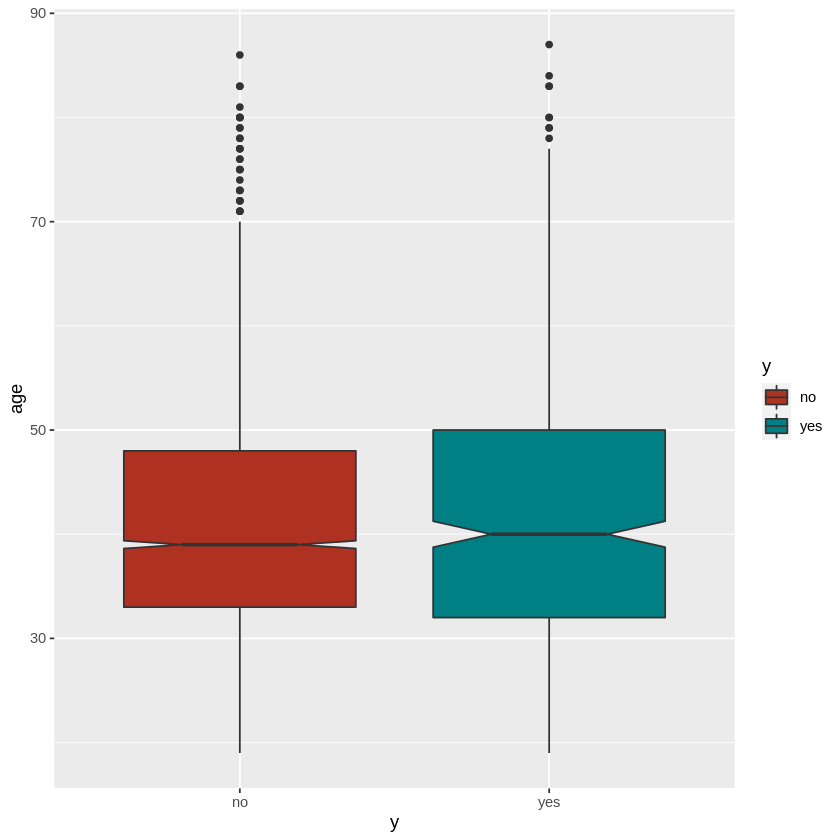

In [ ]:

ggplot(bank, aes(fill=y, x=y, y=age)) +
    geom_boxplot(notch = TRUE) + 
    scale_fill_hue(l=40) 

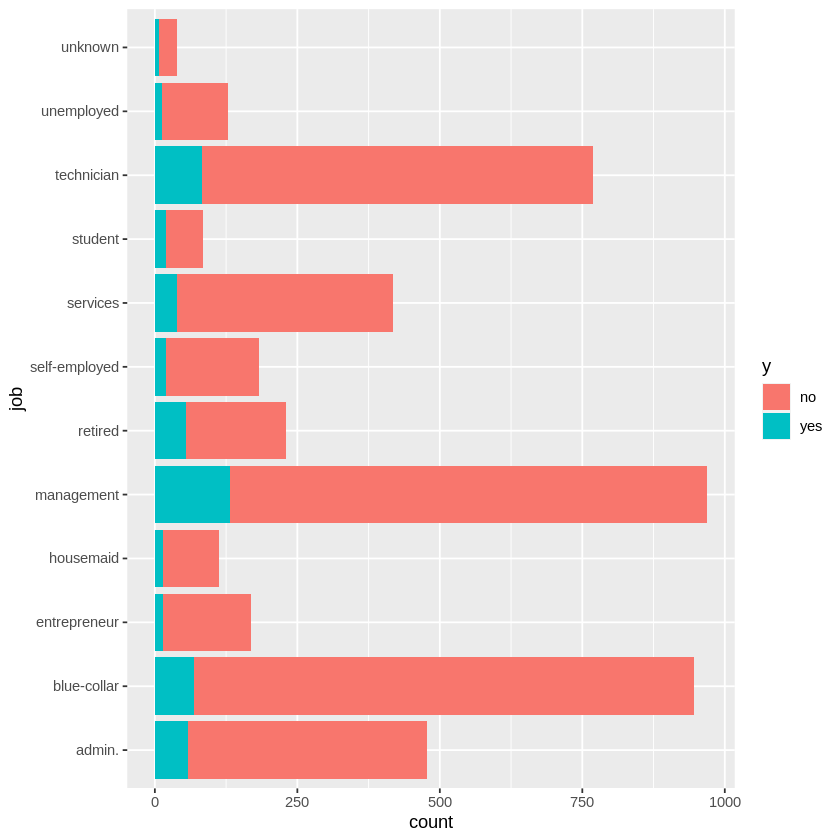

In [ ]:
ggplot(bank, aes(y = job,fill = y) )+ geom_bar()

In [ ]:
install.packages("superml")
library(superml)

In [ ]:
is.char <- names(which(sapply(bank, is.character)))

In [ ]:
bank_new = subset(bank, select = -c(duration))

In [ ]:

lbl <- LabelEncoder$new()
# Label Encoder
for (i in is.char){
  lbl$fit(bank[, i])
  bank_new[, i] <- lbl$fit_transform(bank[, i])
}
head(bank_new)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
1,30,0,0,0,0,1787,0,0,0,19,0,1,-1,0,0,0
2,33,1,0,1,0,4789,1,1,0,11,1,1,339,4,1,0
3,35,2,1,2,0,1350,1,0,0,16,2,1,330,1,1,0
4,30,2,0,2,0,1476,1,1,1,3,3,4,-1,0,0,0
5,59,3,0,1,0,0,1,0,1,5,1,1,-1,0,0,0
6,35,2,1,2,0,747,0,0,0,23,4,2,176,3,1,0


In [ ]:
train <- bank_new[1:3165,]
test <- bank_new[3165:4251,]

In [ ]:
model <- glm(y ~.,family=binomial(link='logit'),data=train)

In [ ]:
summary(model)


Call:
glm(formula = y ~ ., family = binomial(link = "logit"), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6208  -0.5051  -0.4042  -0.3203   2.9420  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.159e+00  3.341e-01  -6.461 1.04e-10 ***
age          2.077e-03  5.664e-03   0.367 0.713841    
job          3.712e-02  2.258e-02   1.644 0.100152    
marital      2.991e-01  8.116e-02   3.685 0.000229 ***
education    8.834e-02  7.903e-02   1.118 0.263697    
default      4.953e-03  4.856e-01   0.010 0.991862    
balance      9.358e-06  1.922e-05   0.487 0.626301    
housing     -4.812e-01  1.269e-01  -3.791 0.000150 ***
loan        -6.032e-01  1.987e-01  -3.035 0.002404 ** 
contact     -3.639e-01  1.145e-01  -3.177 0.001489 ** 
day         -5.558e-03  7.342e-03  -0.757 0.449016    
month        4.118e-03  2.321e-02   0.177 0.859198    
campaign    -5.688e-02  2.755e-02  -2.064 0.038981 *  
pdays       -2.601e-03  

In [ ]:
install.packages('ROCR')
library(ROCR)
install.packages('ranger')
library(ranger)
install.packages('MLmetrics')
library("MLmetrics")
install.packages("superml")
library(superml)

In [ ]:
install.packages("vip")

In [ ]:
pres_results <- predict(model,newdata=subset(test))
pred <- ifelse(pres_results < 0.5, 0, 1)
print("Logistic Regression")
print(paste("Accuracy - ",round(Accuracy(y_pred = pred, y_true =test$y),5)))
print(paste("F1 score - ",round(F1_Score(y_pred = pred, y_true =test$y),5)))

[1] "Logistic Regression"
[1] "Accuracy -  0.8896"
[1] "F1 score -  0.941"


[1] 0.864716

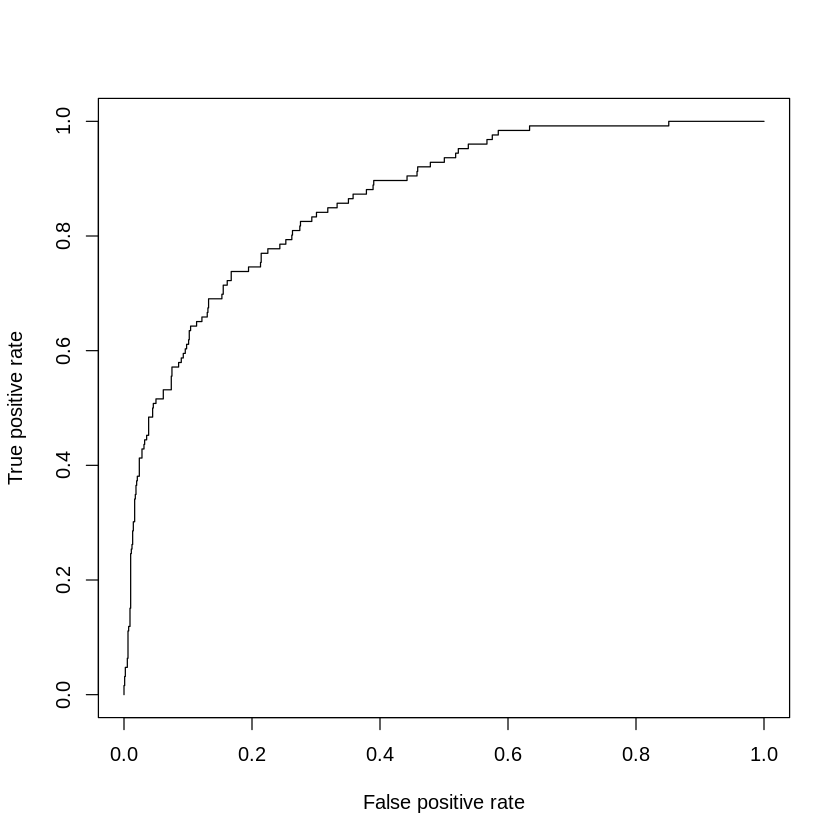

In [ ]:
library(ROCR)
pres_results <- predict(model,newdata=subset(test))
pr <- prediction(pres_results, test$y)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


In [ ]:
install.packages("rpart.plot")
library("rpart.plot")
install.packages("rpart")
library("rpart")
ROSE

In [ ]:
install.packages("ROSE")
library("ROSE")

In [ ]:
install.packages("randomForest")
library(randomForest)
library(caret)

In [ ]:
rftrain <- randomForest(y~., data = train, type = "classification", importance=TRUE,
                        proximity=TRUE)
prediction <-predict(rftrain, test)
pred <- ifelse(prediction < 0.5, 0, 1)
print("Random Forest")
print(paste("Accuracy - ",round(Accuracy(y_pred = pred, y_true =test$y),5)))
print(paste("F1 score - ",round(F1_Score(y_pred = pred, y_true =test$y),5)))

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


[1] "Random Forest"
[1] "Accuracy -  0.89236"
[1] "F1 score -  0.94199"


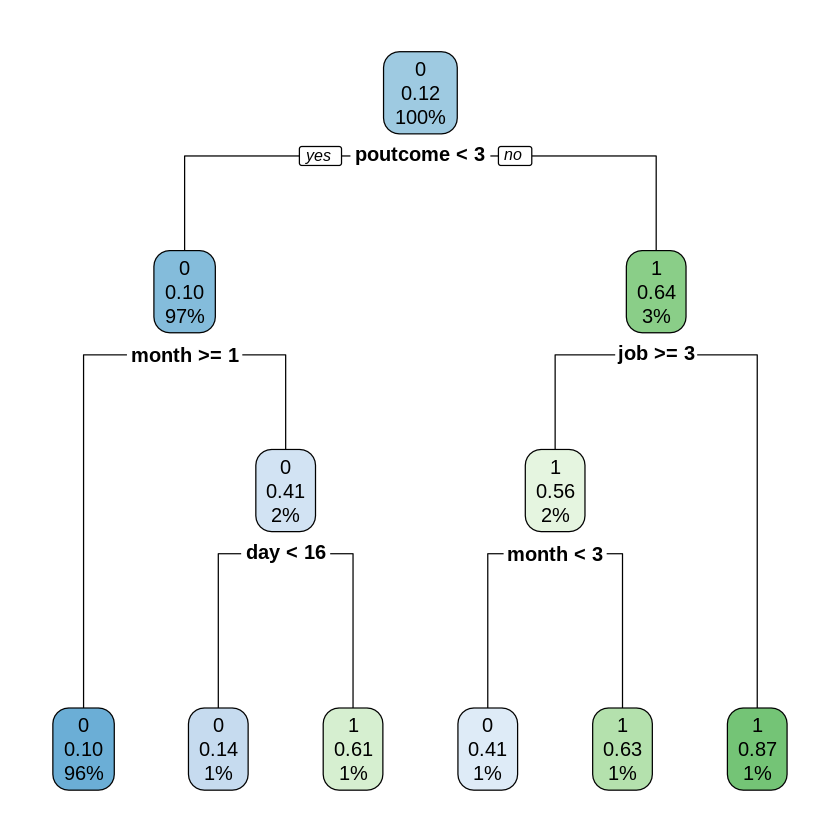

In [ ]:
library(rpart)
library(rpart.plot)
control <- rpart.control(minsplit = 30,
    minbucket = 15,
    maxdepth = 5,
    weights = c(0.3,0.7),
    cp = 0)
fit <- rpart(y~., data = train, method = 'class', control = control)
rpart.plot(fit)

In [ ]:
prediction <-predict(fit, test, type = 'class', weights = c(0.4,0.6))
print("Decision Tree")
print(paste("Accuracy - ",round(Accuracy(y_pred = prediction, y_true =test$y),5)))
print(paste("F1 score - ",round(F1_Score(y_pred = prediction, y_true =test$y),5)))

[1] "Decision Tree"
[1] "Accuracy -  0.8942"
[1] "F1 score -  0.94281"


poutcome      month        day        job        age    balance    marital 
48.5267383 10.9901586  5.3712454  3.9472224  1.4954797  0.9368430  0.7390671 
     pdays   previous 
 0.6245620  0.3834832

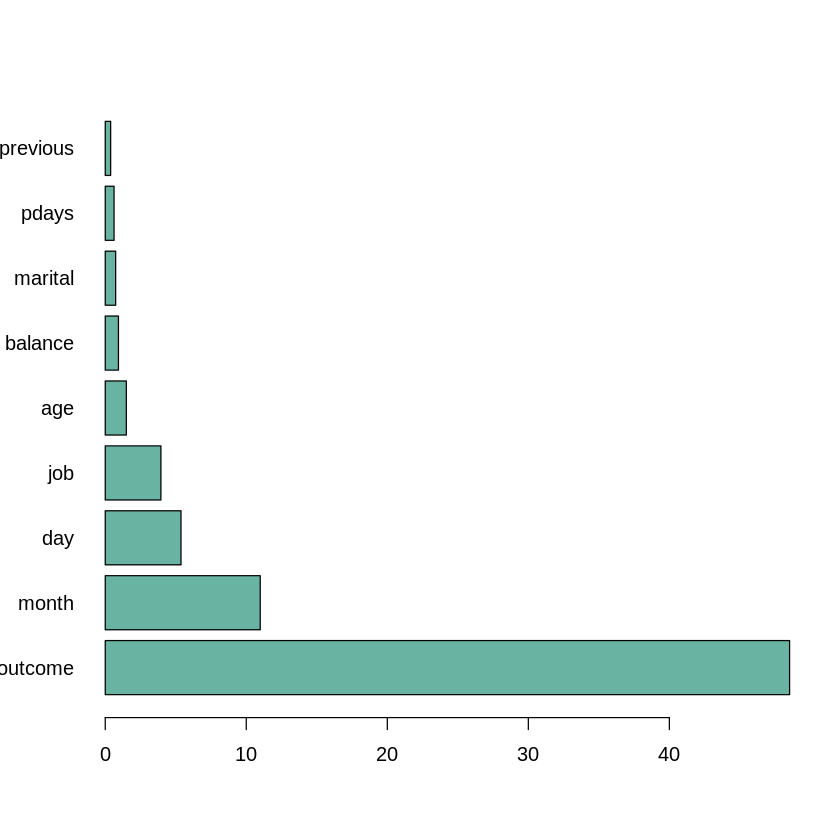

In [ ]:
(vi_tree <- fit$variable.importance)
barplot(vi_tree, horiz = TRUE, las = 1, col = "#69b3a2")

##References :

- https://www.r-bloggers.com/2017/02/finding-optimal-number-of-clusters/

- https://datatricks.co.uk/one-hot-encoding-in-r-three-simple-methods
- https://datascienceplus.com/how-to-apply-linear-regression-in-r/
- https://stackoverflow.com/questions/22921923/ggplot-change-hue-differently-for-2-geoms-covering-same-grouping
-https://www.r-bloggers.com/2015/09/how-to-perform-a-logistic-regression-in-r/
- https://koalaverse.github.io/vip/articles/vip.html

